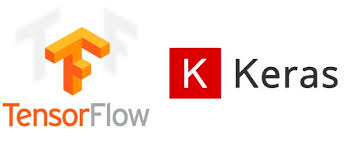

<div style="direction:rtl">
    
# ارزیابی مدل

در این بخش به ارزیابی دو مدل متفاوت شامل مدل رگرسیونی و مدل طبقه بندی می پردازیم. 
ما مقدار خطای مدل اول را با MSE یا میانگین مجموعه خطاها محاسبه می کنیم. سپی در انتها داده های تست را برای ارزیابی مدل به آن میدهیم.
در مدل بعدی ما یک طبقه تعریف می کنیم و سپس مقدار دقت آن را به صورت مقدار اعشار نمایش می دهیم. 
</div>
<div style="direction:rtl">

### Regression Model
برای رگرسیون ما 100 داده تصادفی توسط Normal(mean=1, sd=0.1) تولید می کنیم. همچنین 100 برجسب داده ای با مقدار 10 را تولید می کنیم.  در فرمول رگرسیونی مورد نظر ما مقدار عرض از مبدا را در نظر نمی گیریم. 

$y=A \cdot x$ 

`A` = `10.0`

</div>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

<div style="direction:rtl">
مشخص کردن اندازه دسته  
</div>

In [7]:
batch_size = 25


<div style="direction:rtl">
    
### Generate Data for Regression    
در این بخش ما داده های مورد نیاز برای رگرسیون را تعریف می کنیم. همچنین placeholders مورد نیاز را نیز تعریف می کنیم. پس از آن 80 درصد داده ها را به عنوان داده های آموزش و 20 را به عنوان داده های تست در نظر می گیریم  
</div>


In [3]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

<div style="direction:rtl">
    
### Model Variables and Operations: 
</div>
<div style="direction:rtl">
متغییرها و عملیات اساسی گراف محاسباتی را تعریف می کنیم 
</div>


In [4]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))
# Add operation to graph
my_output = tf.matmul(x_data, A)

### Loss, Optimization Function, and Variable Initialization


- L2 loss
- standard Gradient Descent Optimization 
- learning rate =0.02.

In [5]:
# Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Run Regression


In [8]:
# Run Loop
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))



Step #25 A = [[6.5887623]]
Loss = 11.560059
Step #50 A = [[8.7751875]]
Loss = 1.8689418
Step #75 A = [[9.577851]]
Loss = 0.7319884
Step #100 A = [[9.887116]]
Loss = 1.0355055


### Evaluation of Regression Model
<div style="direction:rtl">
    
برای ارزیابی نیز داده ها را با استفاده از `feed_dict` به مدل می فرستیم با این تفاوت که ما داده ها را به صورت دسته به مدل ارسال نمی کنیم البته می توان این کار را انجام داده به این شرط که دیگر از روش تصادفی استفاده نکنیم. 
</div>


In [9]:
# Evaluate accuracy (loss) on test set
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
print('MSE on test:' + str(np.round(mse_test, 2)))
print('MSE on train:' + str(np.round(mse_train, 2)))

MSE on test:1.61
MSE on train:0.89


# Classification Example

<div style="direction:rtl">
    
برای طبقه بندی ما 100 داده  را به صورت تصادفی یعنی `Normal(mean = -1, sd = 1)` و `Normal(mean = 1, sd = 1).` تولید می کنیم. مقادیر هدف را برای دسته اول 0 و برای دسته ی دوم 1 در نظر می گیریم.
برای طبقه بندی نیز از طبقه بندی دودویی با شرایط زیر استفاده می کنیم. 
</div>


- If $sigmoid(x+A)<0.5$ Then we predict class 0
- If $sigmoid(x+A)>=0.5$ Then we predict class 1


In [27]:
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25

### Generate Classification Data and Targets

<div style="direction:rtl">
    
پس از تولید داده ها 80 درصد داده ها را به عنوان داده های آموزش و 20 را به عنوان داده های تست در نظر می گیریم  
</div>



In [28]:
# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [29]:
y_vals_train

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])




<div style="direction:rtl">
    
### Model Variables and Operations 

ما یک متغییر به نام `A` را تعریف می کنیم. که قرار است با مقدار داده های ورودی جمع شود و عمل یادگیری توسط این متغییر صورت گیرد. مقدار خروجی این عملیات را به یک تابع `sigmoid()`  که نمونه ای از توابع فعال می باشدمی دهیم. اما لازم نیست به صورت صریح آن را فراخوانی کنیم چون تابع `sigmoid_cross_entropy_with_logits` به صورت پیش فرض این عمل را برروی داده های ورودی انجام می دهد.  
</div>


In [31]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

# Add operation to graph
# Want to create the operstion sigmoid(x + A)
# Note, the sigmoid() part is in the loss function
my_output = tf.add(x_data, A)

### Loss, Optimization Function, and Variable Initialization

- Loss=sigmoid-cross-entropy
- `tf.reduce_mean()` 

- optimization function 
- learning rate = 0.05.

In [32]:
# Add classification loss (cross entropy)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output,labels= y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Run Classification


In [33]:
# Run loop
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [4.532451]
Loss = 1.3572319
Step #400 A = [0.99571306]
Loss = 0.5237799
Step #600 A = [-0.23407817]
Loss = 0.24106678
Step #800 A = [-0.51665026]
Loss = 0.21989095
Step #1000 A = [-0.5661715]
Loss = 0.32055244
Step #1200 A = [-0.5943677]
Loss = 0.3088977
Step #1400 A = [-0.599065]
Loss = 0.3124904
Step #1600 A = [-0.6083855]
Loss = 0.22996598
Step #1800 A = [-0.5680487]
Loss = 0.24149542


### Evaluation of Classification Results
https://www.aiworkbox.com/lessons/transfer-a-1-d-tensor-to-a-vector-using-tensorflow

Accuracy on train set: 0.9375
Accuracy on test set: 0.95


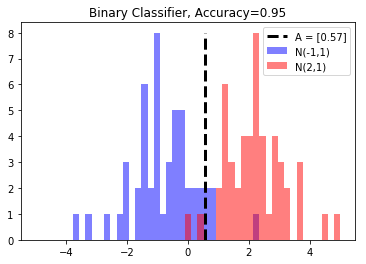

In [36]:
# Evaluate Predictions on test set
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

# Plot classification result
A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='blue')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3, label='A = '+ str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()

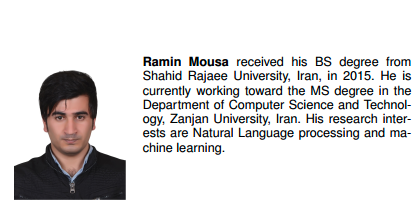